In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.preprocessing import label_binarize

import utils

In [2]:
df = pd.read_csv("dataset/clean_df.csv")

In [3]:
df.columns

Index(['FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'IN_PKTS',
       'L4_DST_PORT', 'L4_SRC_PORT', 'LAST_SWITCHED', 'OUT_BYTES', 'OUT_PKTS',
       'SRC_TO_DST_SECOND_BYTES', 'TCP_FLAGS', 'TCP_WIN_MAX_OUT',
       'TCP_WIN_MSS_IN', 'LABEL', 'PROTOCOL_MAP_ICMP',
       'PROTOCOL_MAP_IPV6_ICMP', 'PROTOCOL_MAP_TCP', 'PROTOCOL_MAP_UDP',
       'L7_PROTO_NAME_AMAZON', 'L7_PROTO_NAME_BITTORRENT', 'L7_PROTO_NAME_DNS',
       'L7_PROTO_NAME_GOOGLE', 'L7_PROTO_NAME_HTTP',
       'L7_PROTO_NAME_HTTP_PROXY', 'L7_PROTO_NAME_ICMP', 'L7_PROTO_NAME_NFS',
       'L7_PROTO_NAME_NTP', 'L7_PROTO_NAME_QUIC', 'L7_PROTO_NAME_SSH',
       'L7_PROTO_NAME_STUN', 'L7_PROTO_NAME_TEAMVIEWER', 'L7_PROTO_NAME_TLS',
       'L7_PROTO_NAME_UNKNOWN'],
      dtype='object')

In [4]:
df.shape

(488370, 32)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FIRST_SWITCHED,488370.0,1.617767e+09,714813.717396,1.616660e+09,1.616673e+09,1.618227e+09,1.618239e+09,1.618262e+09
FLOW_DURATION_MILLISECONDS,488370.0,3.450301e+04,42511.977751,0.000000e+00,0.000000e+00,4.020000e+02,6.027000e+04,1.199980e+05
IN_PKTS,488370.0,1.333558e+00,1.226605,0.000000e+00,0.000000e+00,1.386294e+00,2.397895e+00,1.228577e+01
L4_DST_PORT,488370.0,1.121238e+04,19153.052098,0.000000e+00,8.000000e+01,8.000000e+01,1.506675e+04,6.553500e+04
L4_SRC_PORT,488370.0,4.293148e+04,15591.181890,0.000000e+00,3.752800e+04,4.921400e+04,5.126800e+04,6.553500e+04
LAST_SWITCHED,488370.0,1.617767e+09,714835.844461,1.616660e+09,1.616673e+09,1.618227e+09,1.618239e+09,1.618262e+09
OUT_BYTES,488370.0,4.785248e+00,2.291955,0.000000e+00,3.688879e+00,5.375278e+00,6.269096e+00,1.946137e+01
OUT_PKTS,488370.0,1.230466e+00,1.209224,0.000000e+00,0.000000e+00,1.098612e+00,2.302585e+00,1.222736e+01
SRC_TO_DST_SECOND_BYTES,488370.0,5.601531e+00,1.529573,3.332205e+00,3.784190e+00,5.407172e+00,6.967909e+00,1.914172e+01
TCP_FLAGS,488370.0,1.950446e+01,10.394781,0.000000e+00,1.900000e+01,2.400000e+01,2.700000e+01,2.230000e+02


In [6]:
def scale_x(data):
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(data)
    

In [7]:
def store_df(name, X, y):
    compression_opts = dict(method='zip',
                            archive_name=name+'_X.csv')  
    X.to_csv(name+'_X.zip', index=True,
              compression=compression_opts)  
    compression_opts = dict(method='zip',
                            archive_name=name+'_y.csv')  
    y.to_csv(name+'_y.zip', index=True,
              compression=compression_opts)  

In [8]:
random_forest_df = df.copy()

# Train, Test, Validation Split

In [9]:
y = df["LABEL"]
X = df.drop(["LABEL"], axis = 1)

y.shape, X.shape

((488370,), (488370, 31))

In [10]:
from sklearn.model_selection import train_test_split

val_rate = 15/45

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_rate, random_state=42)

In [11]:
print(len(X_train) / len(X))
print(len(X_val) / len(X))
print(len(X_test) / len(X))

0.5499989761860884
0.1500010238139116
0.3


# Random Forest Model

In [12]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [13]:
# Entrenamos el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Validación

In [14]:
# Realizamos predicciones con las metricas de validación
val_preds = rf.predict(X_val)
val_preds.shape

(73256,)

In [15]:
# Get the results
utils.evaluate_model(y_val, val_preds)

Matrix de confusión: 
 [[18663     2     1     3]
 [    1 18855     0     0]
 [    0     0 17008     0]
 [    2     0     0 18721]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00     18669
         SYN Scan - aggressive       1.00      1.00      1.00     18856
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00     17008
   Denial of Service Slowloris       1.00      1.00      1.00     18723

                      accuracy                           1.00     73256
                     macro avg       1.00      1.00      1.00     73256
                  weighted avg       1.00      1.00      1.00     73256

recall_score:  [0.99967861 0.99994697 1.         0.99989318]
precision_score:  [0.99983928 0.99989394 0.99994121 0.99983978]
f1_score:  [0.99975894 0.99992045 0.9999706  0.99986648]
accuracy:  0.9998771431691602


### Prueba

In [16]:
# Realizamos predicciones con las metricas de validación
test_preds = rf.predict(X_test)

In [17]:
# Get the results
utils.evaluate_model(y_test, test_preds)

Matrix de confusión: 
 [[37172     1     1     2]
 [    4 37568     0     0]
 [    1     0 34285     0]
 [    0     0     0 37477]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      1.00      1.00     37176
         SYN Scan - aggressive       1.00      1.00      1.00     37572
Denial of Service R-U-Dead-Yet       1.00      1.00      1.00     34286
   Denial of Service Slowloris       1.00      1.00      1.00     37477

                      accuracy                           1.00    146511
                     macro avg       1.00      1.00      1.00    146511
                  weighted avg       1.00      1.00      1.00    146511

recall_score:  [0.9998924  0.99989354 0.99997083 1.        ]
precision_score:  [0.99986551 0.99997338 0.99997083 0.99994664]
f1_score:  [0.99987896 0.99993346 0.99997083 0.99997332]
accuracy:  0.999938571165305


### Gráfica de la curva ROC

/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre9/SecurityDS/proyecto-1/attack-detection/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


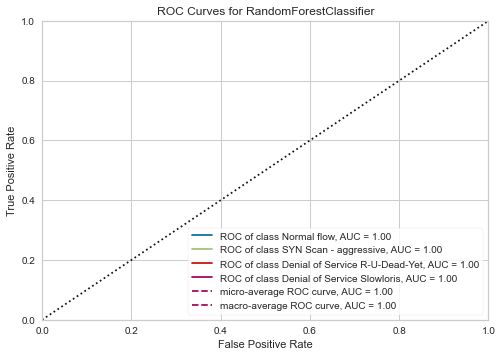

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Normal flow', 1: 'SYN Scan - aggressive',
                2: 'Denial of Service R-U-Dead-Yet',
                3: 'Denial of Service Slowloris'},
       estimator=RandomForestClassifier(n_estimators=50, random_state=42))

In [18]:
utils.plot_roc_curve(rf, X_train, y_train, X_test, y_test)

## K-Fold cross validation

In [29]:
# New division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [34]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
scores

array([0.99982449, 0.99997075, 0.99976599, 0.99985374, 0.99988299,
       0.99991224, 0.99982449, 0.99988299, 0.9999415 , 0.99997075])

# Support Vector Machine

In [19]:
from sklearn.svm import LinearSVC

In [20]:
svc = make_pipeline(StandardScaler(), LinearSVC(max_iter=2000))

In [21]:
# Train the model
svc.fit(X_train, y_train)

/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre9/SecurityDS/proyecto-1/attack-detection/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=2000))])

## Validation

In [22]:
val_preds = svc.predict(X_val)

In [23]:
utils.evaluate_model(y_val, val_preds)

Matrix de confusión: 
 [[18276   223    62   108]
 [   11 18845     0     0]
 [    1     0 16714   293]
 [    0     0    27 18696]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      0.98      0.99     18669
         SYN Scan - aggressive       0.99      1.00      0.99     18856
Denial of Service R-U-Dead-Yet       0.99      0.98      0.99     17008
   Denial of Service Slowloris       0.98      1.00      0.99     18723

                      accuracy                           0.99     73256
                     macro avg       0.99      0.99      0.99     73256
                  weighted avg       0.99      0.99      0.99     73256

recall_score:  [0.97894906 0.99941663 0.98271402 0.99855792]
precision_score:  [0.99934383 0.98830501 0.99470333 0.97900194]
f1_score:  [0.98904132 0.99382976 0.98867233 0.98868324]
accuracy:  0.9901031997379054


## Test

In [24]:
test_preds = svc.predict(X_test)

In [25]:
utils.evaluate_model(y_test, test_preds)

Matrix de confusión: 
 [[36437   412   121   206]
 [   24 37548     0     0]
 [    2     0 33737   547]
 [    0     0    72 37405]]
                                precision    recall  f1-score   support

                   Normal flow       1.00      0.98      0.99     37176
         SYN Scan - aggressive       0.99      1.00      0.99     37572
Denial of Service R-U-Dead-Yet       0.99      0.98      0.99     34286
   Denial of Service Slowloris       0.98      1.00      0.99     37477

                      accuracy                           0.99    146511
                     macro avg       0.99      0.99      0.99    146511
                  weighted avg       0.99      0.99      0.99    146511

recall_score:  [0.98012158 0.99936123 0.98398763 0.99807882]
precision_score:  [0.99928695 0.98914647 0.99431182 0.98026626]
f1_score:  [0.98961148 0.99422761 0.98912279 0.98909235]
accuracy:  0.9905536103091236


## Gráfica de la curva ROC

/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre9/SecurityDS/proyecto-1/attack-detection/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


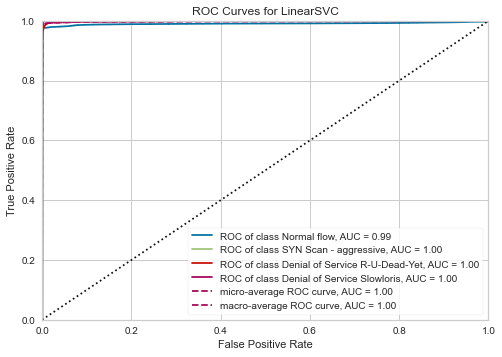

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Normal flow', 1: 'SYN Scan - aggressive',
                2: 'Denial of Service R-U-Dead-Yet',
                3: 'Denial of Service Slowloris'},
       estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('linearsvc', LinearSVC(max_iter=2000))]))

In [28]:
utils.plot_roc_curve(svc, X_train, y_train, X_test, y_test)

# K Fold cross validation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [36]:
svc = make_pipeline(StandardScaler(), LinearSVC(max_iter=2000))

In [37]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
scores

array([0.99970217, 0.99977663, 0.9997394 , 0.99992554, 0.99992554,
       0.99977662, 0.99985108, 0.99992554, 0.99992554, 0.99985108])